In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings 
from warnings import filterwarnings
filterwarnings('ignore')

## Read the data from a csv file

In [3]:
df = pd.read_csv('fcc-forum-pageviews.csv')

## Display the first 5 rows

In [4]:
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


## This shows that there are 1304 rows and 2 columns

In [5]:
df.shape

(1304, 2)

## This shows that there are no missing values

In [6]:
df.isna().sum()

date     0
value    0
dtype: int64

## This shows that there are no dupliacted rows

In [7]:
df[df.duplicated()].shape

(0, 2)

## It shows the datatype of the various columns 

In [8]:
df.dtypes

date     object
value     int64
dtype: object

## Since the first row started from 2016-05-09 we must add the missing 4 mounths values to it but since it is not known we replace it with 0

In [9]:
data = {
    'date': ['2016-01-01','2016-02-01','2016-03-01','2016-04-01'],
    'value': [0, 0, 0, 0]
}

## This adds the dummy data to our dataframe

In [10]:
df = pd.concat([df, pd.DataFrame(data)], ignore_index=True)

## This converts the date column from being a string to a datetime datatype

In [11]:
df['date'] = pd.to_datetime(df.date)

## This shows the datatype of the columns and as you can see the date column is now of datatype datetime

In [12]:
df.dtypes

date     datetime64[ns]
value             int64
dtype: object

## This sets the date column as the index

In [13]:
df.set_index('date', inplace=True)

## This displays the first 5 rows

In [14]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


## This removes all the rows with their value less than 2.5% of the value

In [33]:
clean_data = df[df.value >= df.value.quantile(0.025)]

## This shows that the rows have decreased from 1304 to 1275

In [16]:
clean_data.shape

(1275, 1)

## This removes all the rows with their value greater than 97.5% of the value

In [17]:
clean_data = clean_data[clean_data.value <= clean_data.value.quantile(0.975)]

## This shows that the rowws have decreased from 1275 to 1243

In [18]:
clean_data.shape

(1243, 1)

## This returns the index of each row in the dataframe

In [19]:
clean_data.index

DatetimeIndex(['2016-05-19', '2016-05-20', '2016-05-26', '2016-05-27',
               '2016-05-28', '2016-05-29', '2016-06-07', '2016-06-08',
               '2016-06-09', '2016-06-10',
               ...
               '2019-11-16', '2019-11-17', '2019-11-20', '2019-11-21',
               '2019-11-23', '2019-11-24', '2019-11-29', '2019-11-30',
               '2019-12-01', '2019-12-03'],
              dtype='datetime64[ns]', name='date', length=1243, freq=None)

## This creates a function that is used to draw a line plot

In [20]:
def draw_line_plot(data):
    plt.figure(figsize=(12, 4))
    plt.plot(data.index, data.value, color='red')
    plt.xlabel('Date')
    plt.ylabel('Page Views')
    plt.title('Daily FreeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.show()

## The function is called and used to draw a line plot

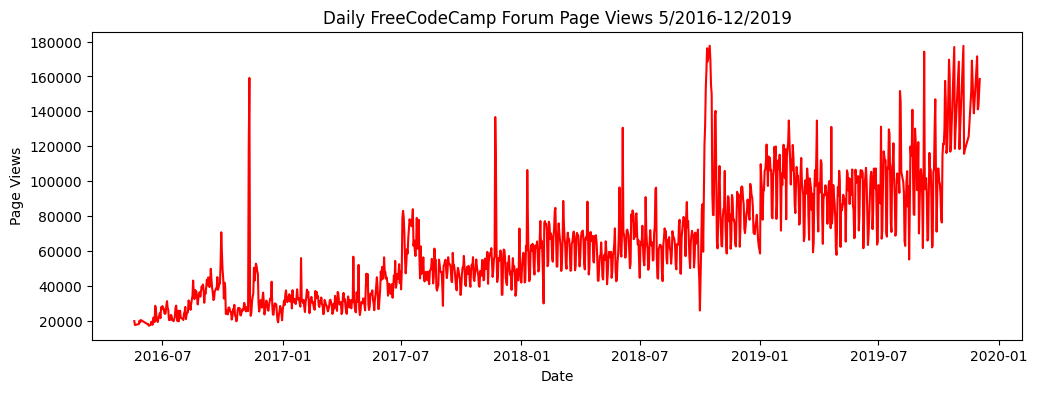

In [21]:
draw_line_plot(clean_data)

## This changes the date from being the index to being a column for both df and clean_data dataframe

In [22]:
df.reset_index(inplace=True)
clean_data.reset_index(inplace=True)

## This gets the year value from the date column and store it in a new column year in both df and clean_data dataframe

In [23]:
df['year'] = df.date.dt.year
clean_data['year'] = clean_data.date.dt.year

## This gets the month value from the date column and store it in a new column month in both df and clean_data dataframe

In [24]:
df['month'] = df.date.dt.month
clean_data['month'] = clean_data.date.dt.month

## This gets the month name value from the date column and store it in a new column month name in both df and clean_data dataframe

In [25]:
df['month name'] = df.date.dt.month_name()
clean_data['month name'] = clean_data.date.dt.month_name()

## This displays the first 5 rows

In [26]:
df.head()

,date,value,year,month,month name
0,2016-05-09,1201,2016,5,May
1,2016-05-10,2329,2016,5,May
2,2016-05-11,1716,2016,5,May
3,2016-05-12,10539,2016,5,May
4,2016-05-13,6933,2016,5,May


## This displays the last 5 rows

In [27]:
df.tail()

,date,value,year,month,month name
1303,2019-12-03,158549,2019,12,December
1304,2016-01-01,0,2016,1,January
1305,2016-02-01,0,2016,2,February
1306,2016-03-01,0,2016,3,March
1307,2016-04-01,0,2016,4,April


## This displays the first 5 rows 

In [28]:
clean_data.head()

,date,value,year,month,month name
0,2016-05-19,19736,2016,5,May
1,2016-05-20,17491,2016,5,May
2,2016-05-26,18060,2016,5,May
3,2016-05-27,19997,2016,5,May
4,2016-05-28,19044,2016,5,May


## This groups the df dataframe by the year then by the months and returns the average of the values of each month sorted by the year followed by the month

In [29]:
grouped_data = df.groupby(['year', 'month name', 'month'], as_index=False)['value'].mean().sort_values(['year','month'])

## This displays the grouped data

In [30]:
grouped_data

,year,month name,month,value
4,2016,January,1,0.000000
3,2016,February,2,0.000000
7,2016,March,3,0.000000
0,2016,April,4,0.000000
8,2016,May,5,11242.695652
6,2016,June,6,19124.366667
5,2016,July,7,23314.225806
1,2016,August,8,31049.193548
11,2016,September,9,41476.866667
10,2016,October,10,27398.322581


## This visualizes that grouped data using seaborns barplot with the hue being the month name column

Text(0.5, 0, 'Years')

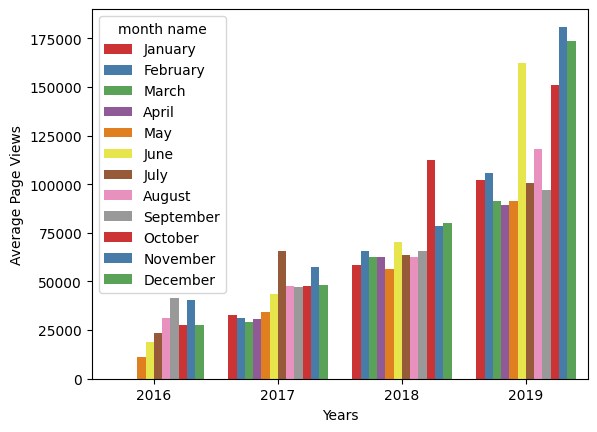

In [31]:
sns.barplot(data=grouped_data, x='year', y='value', hue='month name', palette='Set1')
plt.ylabel('Average Page Views')
plt.xlabel('Years')

## This creates a boxplot for the year column and the month column stacked side by side

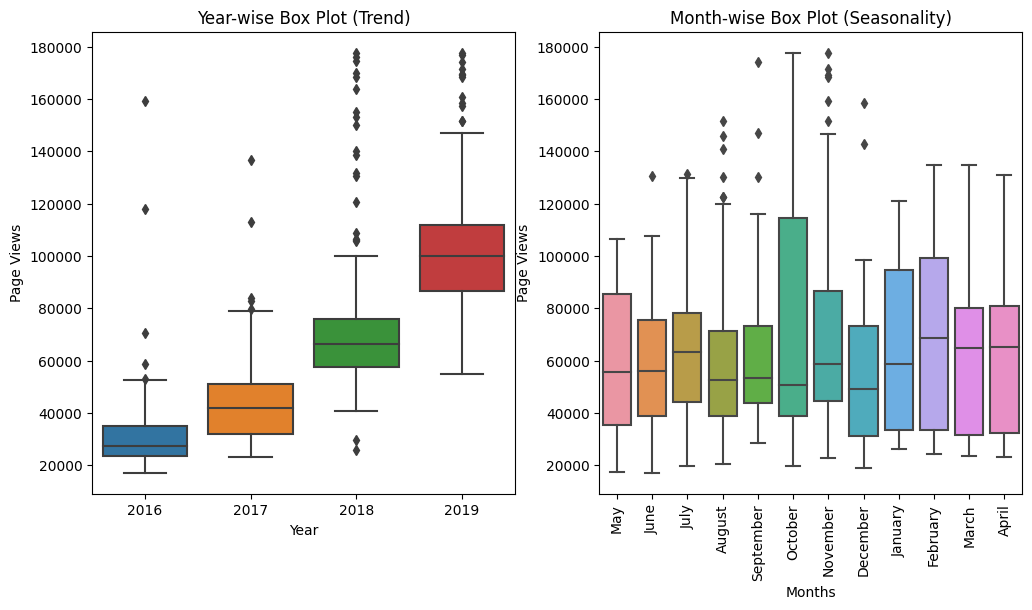

In [32]:
plt.figure(figsize=(12,6))
ax1 = plt.subplot(1, 2, 1)
sns.boxplot(data=clean_data, x='year', y='value', ax=ax1)
ax1.set_title('Year-wise Box Plot (Trend)')
ax1.set_ylabel('Page Views')
ax1.set_xlabel('Year')
ax2 = plt.subplot(1, 2, 2)
sns.boxplot(data=clean_data, x='month name', y='value', ax=ax2)
ax2.set_title('Month-wise Box Plot (Seasonality)')
ax2.set_ylabel('Page Views')
ax2.set_xlabel('Months')
ax2.set_xticklabels(labels = df['month name'].unique(), rotation='vertical')
plt.show()